<a href="https://colab.research.google.com/github/nantasrujana33/data-mining/blob/main/CA02_Divya_Tilottama_Srujana_Applied_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advanced Data and Network Mining CA2**
# *Title-Vehicle Insurance Claim Fraud Detection*





# **Business Problem Framing:**

### Objective 1: Define the problem to be addressed

The main challenge is to identify the fraudulent claims in the vehicle insurance dataset. Insurance fraud creates considerable financial losses for companies and finding fraudulent claims in advance can help to save money and enhance productivity.






### Objective 2: Identify the Stakeholders

The primary stakeholders are:

1. Insurance Companies
2. Fraud Investigators
3. Policy Holders

### Objective 3: Determine problem suitable for an analytics solution

Adequate data with appropriate features is handy for analysis creating this topic suitable for applying classification algorithms to predict fradulent claims. Precisely detecting fraud can result to consequencial cost saving for the industry.


### Objective 4: Refine problem with any constraints

Create a predictive model using available data to order vehicle insurance claims as fraudulent or non fradulent.Restriction comprise secure data privacy, sustain model accuracy, and combining the model into existing business operations.

### Objective 5: Define business benefits

Depletion in pay for fradulent claims
Efficient process for detecting claims
Ehancing customer belief and fulfilment due to reasonable premiums.

# **Analytics Problem Framing:**

### Objective 1: Reformulate problem statement as an analytics problem

This is a binary classification model to predict the chance of fraudulent vehicle insurance claim established on provided features.






### Objective 2: Develop ABT attributes and outputs

Attributes includes all the features and output is to find whether the claim is fraudulent or not

### Objective 3: State the set of assumptions related to the problem

The historical data is predictive of future claims
The features recommended are enough to predict trends that imply fraud
Data quality problems like missing values and unpredictability can be effectively address.

### Objective 4: Define the key metrics of success

Accuracy, Precision, Recall, F1-Score and ROC-AUC for predictive model

# **Data:**

### Objective 1: Data needs and sources

Data Need: The dataset provides the required details about policy holders, claims and vehicle specifics

Source: Vehicle Insurance claim fraud Detection taken from Kaggle

https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection


### Objective 2: Aquire Data



In [ ]:
import pandas as pd

# Load the data
df= pd.read_csv('fraud_oracle_updated.csv')

#Dispaly first few data's of the dataset
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
#Display available variables in dataset
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
#Checking duplicate values
df.duplicated().sum()

0

In [ ]:
#check the values of target variable 'FraudFound_P'
df['FraudFound_P'].value_counts()

,count
FraudFound_P,
0,14497
1,923


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

# transform categorical values into numerical representations
df['FraudFound_P']=le.fit_transform(df['FraudFound_P'])
df['FraudFound_P'].value_counts()

,count
FraudFound_P,
0,14497
1,923


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15100 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

In [ ]:
# transforming the values in the column (col) into numerical representations
# converting from object and float64 values to integer values

ls=['Month','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','Sex','MaritalStatus','Fault','PolicyType','VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AgentType','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy']
for col in ls:
  df[col]=le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  int64  
 4   AccidentArea          15420 non-null  int64  
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  int64  
 9   MaritalStatus         15420 non-null  int64  
 10  Age                   15100 non-null  float64
 11  Fault                 15420 non-null  int64  
 12  PolicyType            15420 non-null  int64  
 13  VehicleCategory       15420 non-null  int64  
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

### Objective 3: Explore Data Visually

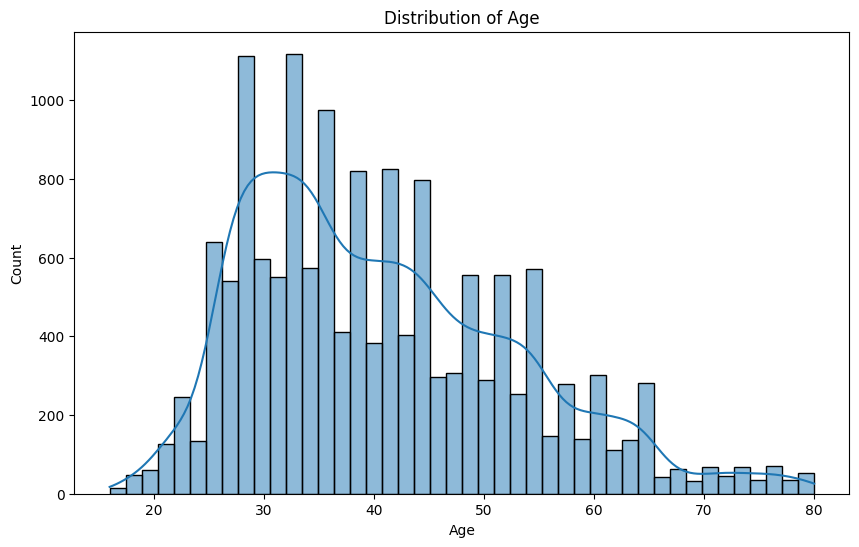

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for Age using histogram

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

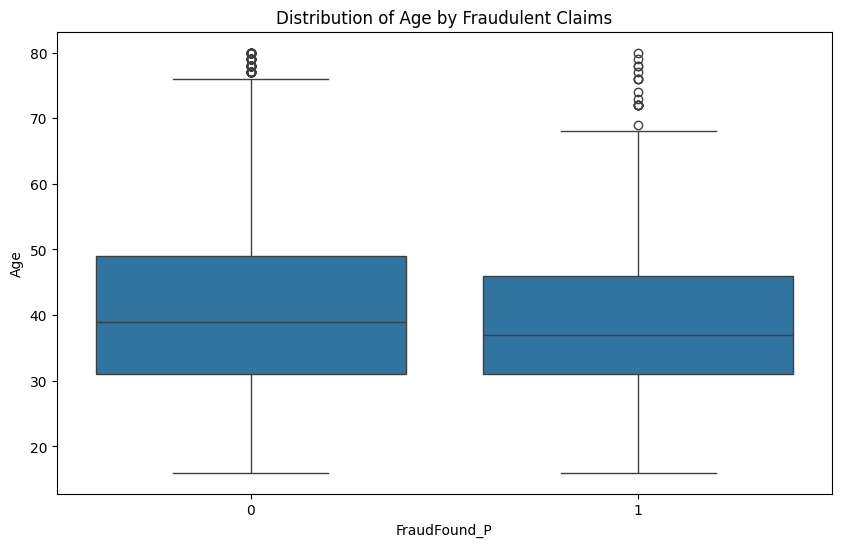

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of Age using boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x='FraudFound_P', y='Age',data=df)
plt.title('Distribution of Age by Fraudulent Claims')
plt.show()



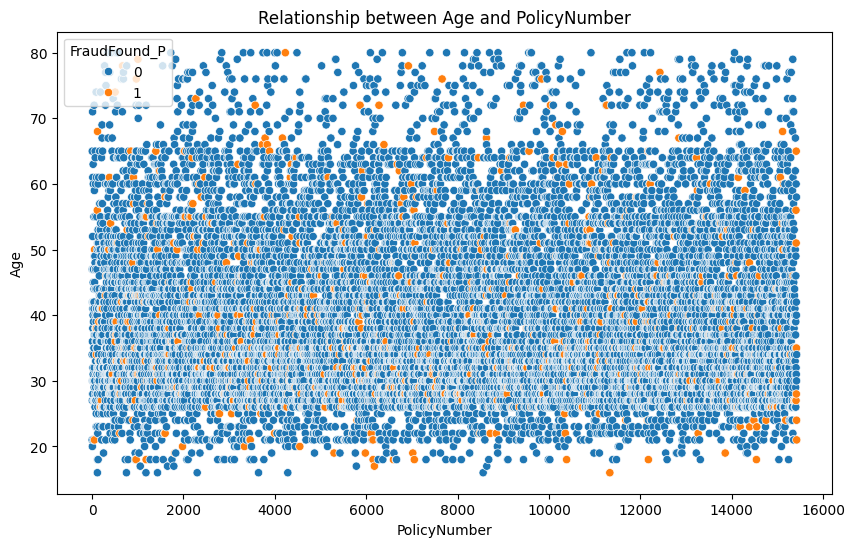

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Relationship between Age and PolicyNumber

plt.figure(figsize=(10,6))
sns.scatterplot(x='PolicyNumber', y='Age',hue='FraudFound_P', data=df)
plt.title('Relationship between Age and PolicyNumber')
plt.show()



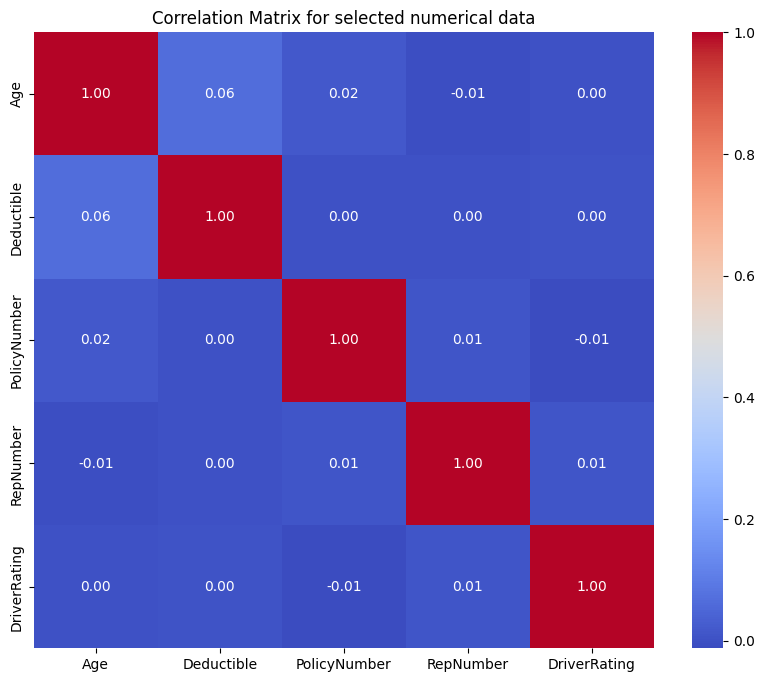

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data= ['Age','Deductible','PolicyNumber','RepNumber','DriverRating']
#Relationship between Numerical data using correlation matrix

plt.figure(figsize=(10,8))
corr_matrix=df[numerical_data].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for selected numerical data')
plt.show()

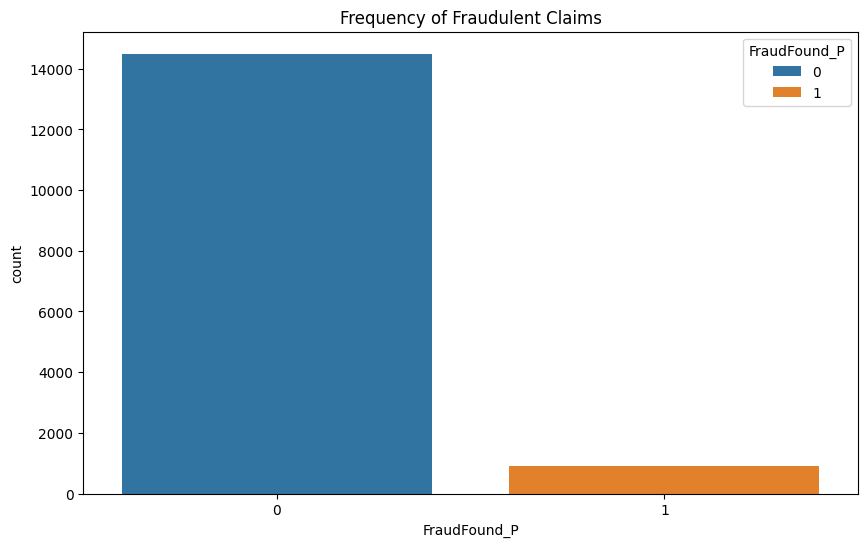

In [ ]:
#categorical data analysis for FraudFound_P

plt.figure(figsize=(10,6))
sns.countplot(x='FraudFound_P',hue='FraudFound_P', data=df)
plt.title('Frequency of Fraudulent Claims')
plt.show()


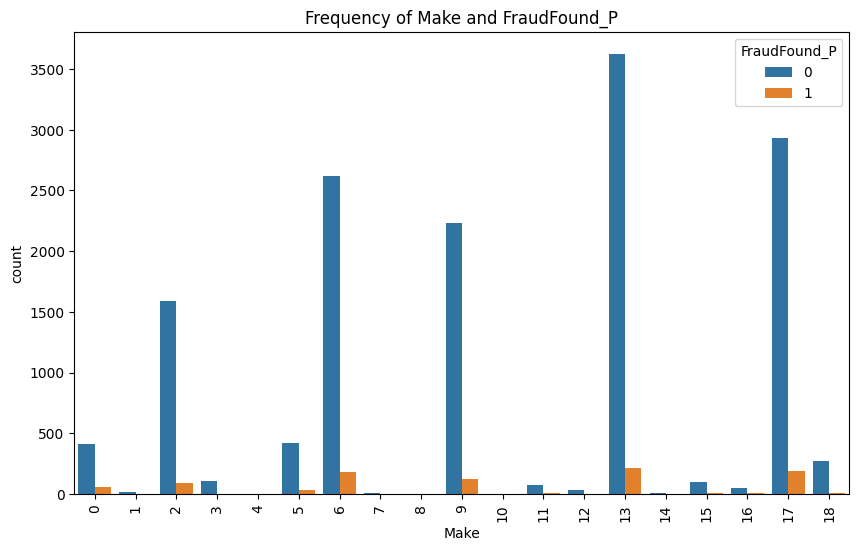

In [ ]:
#Frequency of Fraudulent claims by vehicle make

plt.figure(figsize=(10,6))
sns.countplot(x='Make', hue='FraudFound_P', data=df)
plt.title('Frequency of Make and FraudFound_P')
plt.xticks(rotation=90)
plt.show()

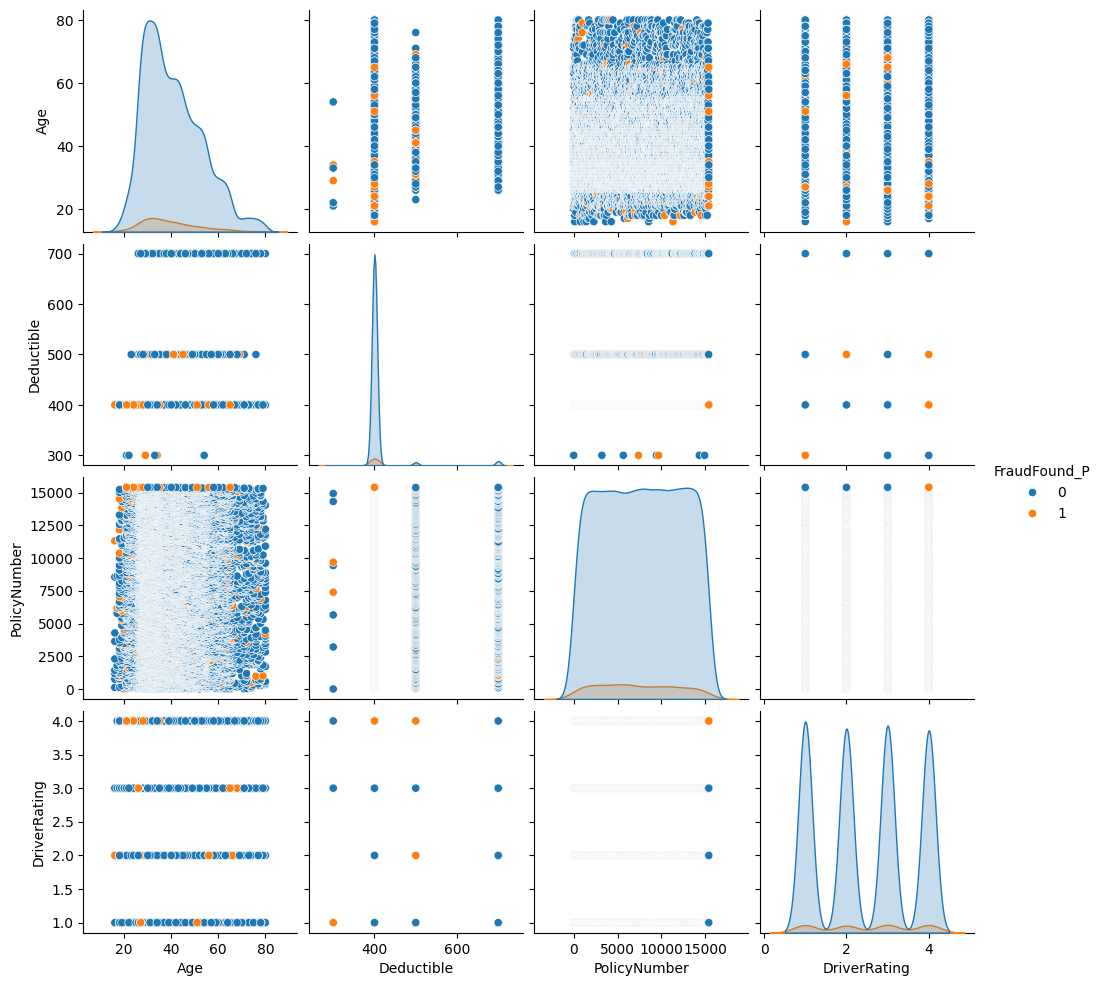

In [ ]:
sns.pairplot(df[['Age','Deductible','PolicyNumber','DriverRating','FraudFound_P']], hue='FraudFound_P')
plt.show()

### Objective 4: Harmonize, rescale and clean data

In [ ]:
# Checking the missing values for the columns

missingdata= df.isnull().sum()
print('Missing values:\n', missingdata)

#Handling missing values in 'Age' by imputing with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

#Using get_dummies , encoding the categorical variables
df_encoded =pd.get_dummies(df, drop_first=True)

#Rescaling Numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data=['Age','Deductible','PolicyNumber','RepNumber','DriverRating']
df_encoded[numerical_data] = scaler.fit_transform(df_encoded[numerical_data])

#Display transformed dataset
df_encoded.head()




Missing values:
 Month                     0
WeekOfMonth               0
DayOfWeek                 0
Make                      0
AccidentArea              0
DayOfWeekClaimed          0
MonthClaimed              0
WeekOfMonthClaimed        0
Sex                       0
MaritalStatus             0
Age                     320
Fault                     0
PolicyType                0
VehicleCategory           0
VehiclePrice              0
FraudFound_P              0
PolicyNumber              0
RepNumber                 0
Deductible                0
DriverRating              0
Days_Policy_Accident      0
Days_Policy_Claim         0
PastNumberOfClaims        0
AgeOfVehicle              0
AgeOfPolicyHolder         0
PoliceReportFiled         0
WitnessPresent            0
AgentType                 0
NumberOfSuppliments       0
AddressChange_Claim       0
NumberOfCars              0
Year                      0
BasePolicy                0
dtype: int64


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


### Objective 5: Document and report findings

**Quality and cleaning data:**

First we have checked for the missing values in the dataset and find some of the data is missing in the Age Column. The quality check for data did not find any anomalies, unreal values or incorrect classifications during the first review.

**Data Transformation:**

Categorical variables containing Month, WeekOfMonth,DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Sex, MaritalStatus, Fault, PolicyType, VehicleCategory,
VehiclePrice, FraudFound_P, Days_Policy_Accident,
Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle,
AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year and BasePolicy were encoded into numerical formats using label encoding and onehot label encoding techniques.This transformation assures that categorical data is precisely modeled for analysis. Also, numerical variables containing Age, Deductible, PolicyNumber, RepNumber, DriverRating were optimized to have zero mean and zero variance enabling constant normalization during the model training.

**Visual Data Insigts:**

The distribution of **Age** show a wide range specify the various age groups in the dataset. It is vital t evaluate risk and consequences at the different point of age.

The target variable **FraudFound_P** was accurately encoded, with balanced classes ensuring optimal model training without considerable unbalanced classes.

The visual analysis identified a highly balanced distribution of the target variable **FraudFound_P** implying that the dataset is suitable for predictive analysis with no major imbalanced class problems.

### Objective 6: Refine the business and analytics problem statements

We can refine our problem statements as follows based on data exploration and initial modelling efforts.

**Refined Business Problem Statements:**

The initial challenge was to discover the factors that impact on predicting fraudulent claims.

According to data preparation methods the refined Business challenge is to build a predictive model to detect fraudulent insurance claims by using the dataset that covers numerous categorical and numerical data related to the claims.


**Refined Analytics Problem Statements:**

The initial challenge is to discover a model for identifying wether the Insurance claim is fraudulent or not.

Provided the data transformations and encoding methods, the enhanced Analytical problem is to use the clean and transformed dataset to impliment classification techniques that predict the chance of fraudulent Insurance claim or not, an emphasis on improving model accuracy and understanding.

# **Methodology (Approach) Selection:**

### Objective 1: Potential problem solving approaches (methods)

Various machine learning algorithms can be used to predict fraudulent insurance claim based on the features in dataset.

**Logistic Regression:** It is a baseline model for acquiring knowledge of feature relationships and performance. It is important to recognize basic fraudulent patterns and the affect of each attributes.

**Random Forest Classifier:** It is ideal for more strong and precise model that can handle complex relationships and non-linearity in the data and to control overfitting

**Gradient Boosting Machines:** Selected for best prediction performance, particularly intend to dedicate time enhancing hyperparameter tuning and handling complex dataset. It is efficient in detecting complex patterns and relationships.

### Objective 2: Software tools

Python used for data processing and modeling and Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, XGBoost are the libraries used

### Objective 3: Test approaches (methods)

Using the default parameters we first fit each model to develop a baseline performace. Based on its result we will cross validate for the best result.

### Objective 4: Select approaches (methods)

Based on the metrics such as accuracy, precision,F1-Score, recall and ROC-AUC we compare the model performance

# **Model Building:**

### Objective 1: Model structures

Columns in df_encoded: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')
   Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0      2            5          6     6             1                 6   
1      4            3          6     6             1                 2   
2     10            5          0     6             1                 5   
3      6            2          2    17             0                 1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Result of LogisticRegression:
Accuracy: 0.9361
ROC AUC: 0.5000
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



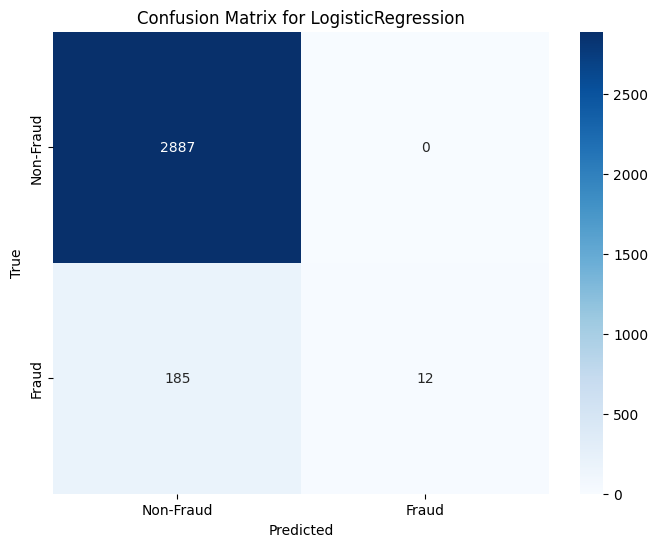

Result of RandomForestClassifier:
Accuracy: 0.9368
ROC AUC: 0.5051
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.01      0.02       197

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.49      3084
weighted avg       0.94      0.94      0.91      3084



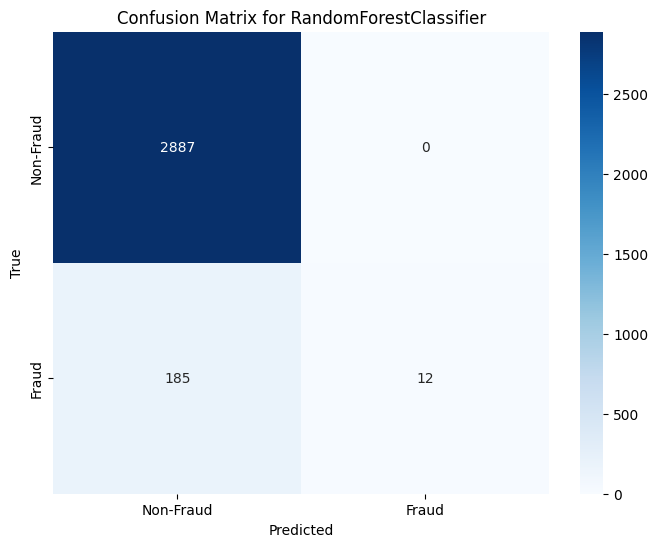

Result of GradientBoostingClassifier:
Accuracy: 0.9400
ROC AUC: 0.5305
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.06      0.11       197

    accuracy                           0.94      3084
   macro avg       0.97      0.53      0.54      3084
weighted avg       0.94      0.94      0.91      3084



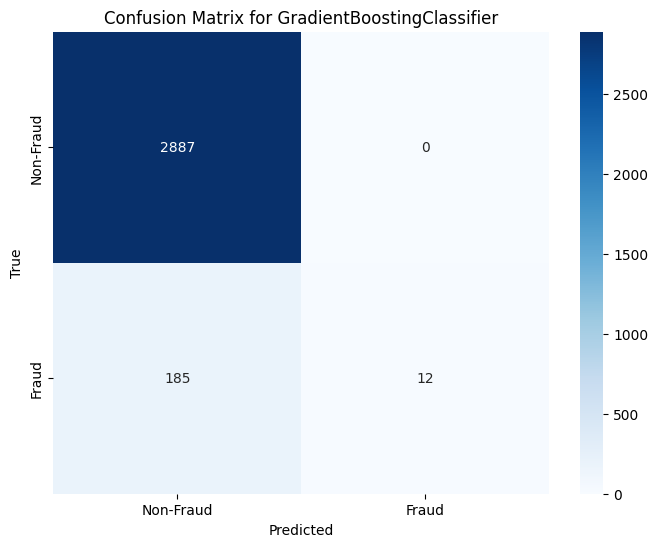

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print("Columns in df_encoded:", df_encoded.columns)

# Check the first few rows
print(df_encoded.head())

#Splitting train and test datasets
X= df_encoded.drop('FraudFound_P', axis=1)
y= df_encoded['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Data Scaling
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#Model initialization
logistic_model=LogisticRegression(random_state=42, max_iter=1000)
randomforest_model= RandomForestClassifier(random_state=42)
gbm_model= GradientBoostingClassifier(random_state=42)

#Dictionary for easy model comparison
model={"LogisticRegression":logistic_model,
       "RandomForestClassifier": randomforest_model,
       "GradientBoostingClassifier":gbm_model}

#Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  accuracy= accuracy_score(y_test, y_pred)
  roc_auc= roc_auc_score(y_test, y_pred)
  report= classification_report(y_test, y_pred)
  Confusion_matrix=confusion_matrix(y_test, y_pred)
  return accuracy, roc_auc, report, Confusion_matrix


#Train and evaluate model
result ={}
for name, model in model.items():
    accuracy, roc_auc, report, Confusion_matrix= evaluate_model(model,X_train, X_test, y_train, y_test)
    result[name] ={
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification report": report,
        "Confusion Matrix": Confusion_matrix
    }


#Print result of each model
for model_name, metrics in result.items():
  print(f"Result of {model_name}:")
  print(f"Accuracy: {metrics['Accuracy']:.4f}")
  print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
  print("Classification report:")
  print(metrics['Classification report'])

#Confusion matrix graph

  Confusion_matrix = metrics['Confusion Matrix']
  plt.figure(figsize=(8, 6))
  sns.heatmap(Confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'Confusion Matrix for {model_name}')
  plt.show()



### Objective 2: Run and evaluate the models

**Logistic Regression:**

Accuracy- 93.61%

ROC-AUC-  50%

Classification Report:

Precision for fraudulent insurance claim
Class 0: 0.94
Class 1: 0.00

Recall for fraudulent insurance claim
Class 0: 1.00
Class 1: 0.00

F1-Score for fraudulent insurance claim
Class 0: 0.97
Class 1: 0.00

**Random Forest Classifier:**

Accuracy- 93.68%

ROC-AUC-  50.51%

Classification Report:

Precision for fraudulent insurance claim
Class 0: 0.94
Class 1: 1.00

Recall for fraudulent insurance claim
Class 0: 1.00
Class 1: 0.01

F1-Score for fraudulent insurance claim
Class 0: 0.97
Class 1: 0.02


**Gradient Boosting Classifier:**

Accuracy- 94.00%

ROC-AUC-  53.05%

Classification Report:

Precision for fraudulent insurance claim
Class 0: 0.94
Class 1: 1.00

Recall for fraudulent insurance claim
Class 0: 1.00
Class 1: 0.06

F1-Score for fraudulent insurance claim
Class 0: 0.97
Class 1: 0.11



Results of Gradient Boosting Classifier:
Best Parameter:{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score:0.991615020580667
Accuracy:0.9394725464764375
ROC AUC:0.5530304683616436
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4341
           1       0.54      0.11      0.19       285

    accuracy                           0.94      4626
   macro avg       0.74      0.55      0.58      4626
weighted avg       0.92      0.94      0.92      4626



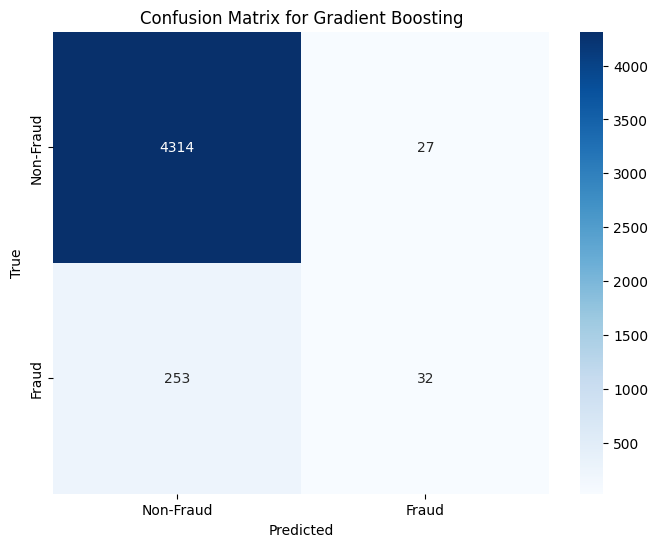

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X= df_encoded.drop('FraudFound_P', axis=1)
y= df_encoded['FraudFound_P']
#Splitting train and test datasets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

#SMOTE to balance classes
smote= SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

#GridSearchCV for Gradient boosting
param_grid= {
    'n_estimators':[100,200],
    'max_depth':[3,5],
    'learning_rate':[0.01, 0.1]
}

gbm_grid= GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')

#Fit model on resampled data
gbm_grid.fit(X_resampled, y_resampled)

#Grid search best model parameter and best score
best_params= gbm_grid.best_params_
best_score= gbm_grid.best_score_


#Evaluate test set
best_gbm= gbm_grid.best_estimator_
y_pred= best_gbm.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
classification_rep= classification_report(y_test, y_pred)

#printing results:
print(f"Results of Gradient Boosting Classifier:")
print(f"Best Parameter:{best_params}")
print(f"Best Score:{best_score}")
print(f"Accuracy:{accuracy}")
print(f"ROC AUC:{roc_auc}")
print(f"Classification report:\n{classification_rep}")

#Confusion Matric graph
Confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.show()



**Model Parameter:**

Learning rate: 0.1
max_depth: 5
n_estimators:200

The above parameters were chosen using grid search cross validation and improving for the ROC AUC.

Best Score ROC AUC: 0.991. This highscore mentiones that during cross validation it is performing well.

**Performance on Test Data:**

Accuracy- 0.939, which understand the initial models accuracy above 94%. Although it's high accuracy,this model compete to predict fraudulent claims in dataset with less false claims.

ROC AUC- 0.553, It is increased from the initial models, however it still shows poor performance when differentiating between fraudulent and non fraudulent claims.

Precision(0)- 0.94 : This model is good at detecting the non- fradulent claims by showing 94% claims predicted as non fraudulent.

Precision(1)- 0.54 : Half of the fraudulent predictions are false positives because only 54% are predicted as fraudulent claims were actually it is fraudulent

Recall(0)- 0.99 : 99% of the claims are predicted correctly as non-fraudulent by the model

Recall(1)- 0.11 : Only 11% of the claims are predicted as fraudulent, which means this models misses to predict many fraudulent claims, that it contains more number of false negatives

F1-score(0)- 0.97 : Which is high for detecting non fraudulent claims, which shows strong performance from the list since it measures both precision and recall

F1-score(1)- 0.19 : Poor balance between precision and recall. This is the worst model when compared with the other category

Model can be improved for detecting fraudulent claims by further resampling techniques, identifying abnormality or a cost sensitive learning approach. These methods can help to tackle imbalance class and strengthen the performance of the model and identifying fraudulent claims



Results of Gradient Boosting Classifier:
Best Parameter: {'learning_rate': 0.08943727088704057, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 198}
Best cross-validation ROC AUC: 0.9913388398846704
Accuracy: 0.9394725464764375
ROC AUC: 0.5464736478376314
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4341
           1       0.55      0.10      0.17       285

    accuracy                           0.94      4626
   macro avg       0.75      0.55      0.57      4626
weighted avg       0.92      0.94      0.92      4626



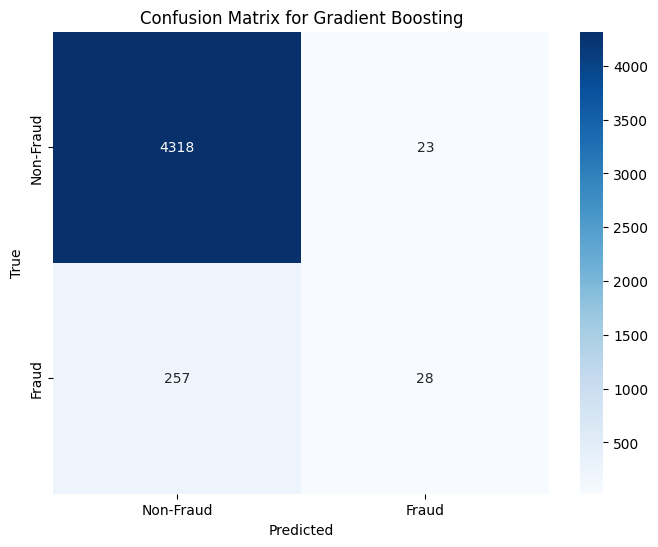

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 201),
    'max_depth': randint(3, 6),
    'learning_rate': uniform(0.01, 0.09),
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 7)
}

# RandomizedSearchCV for Gradient Boosting with expanded parameters
gbm_random = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit model on resampled data
gbm_random.fit(X_resampled, y_resampled)

# Grid search best model parameter and best score
best_params = gbm_random.best_params_
best_score = gbm_random.best_score_

# Evaluate test set
best_gbm = gbm_random.best_estimator_
y_pred = best_gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing results
print(f"Results of Gradient Boosting Classifier:")
print(f"Best Parameter: {best_params}")
print(f"Best cross-validation ROC AUC: {best_score}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification report:\n{classification_rep}")

#Confusion Matric graph
Confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.show()

**Model Parameter:**

learning_rate= 0.08943727088704057, max_depth= 5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 198

The above models are well tuned to detect precise patterns in the data while avoiding overfitting. This approach finds balance between learning rate and max_depth with the n_estimators and gives accurate prediction while being robust against overfitting.

**Performance on Test Data:**

Accuracy- 0.939, which understand the initial models accuracy above 94%.

ROC AUC- 0.54, It is increased from the initial models

Precision(0)- 0.94 : This model is good at detecting the non- fradulent claims by showing 94%

Precision(1)- 0.55 : Half of the fraudulent predictions are false positives

Recall(0)- 0.99 : 99% of the claims are predicted correctly

Recall(1)- 0.10 : Only 10% of the claims are predicted as fraudulent

F1-score(0)- 0.97 : Which is high for detecting non fraudulent claims

F1-score(1)- 0.17 : Poor balance between precision and recall

This model is good in detecting non-fraudulent claims but still it is struggling to predict the fraudulent claims when seeing the results of fraudulent claims Recall and F1-score. For improving the fraudulent claims further tuning or additional techniques like addressing class imbalance or feature engineering are required.

Results of Gradient Boosting Classifier using RandomizedSearchCV:
Best Parameter: {'learning_rate': 0.08506147516408584, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 198, 'subsample': 0.7063088384557132}
Best Score: 0.9931157324874215
Accuracy: 0.9379593601383485
ROC AUC: 0.5489457922622728
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4341
           1       0.48      0.11      0.17       285

    accuracy                           0.94      4626
   macro avg       0.71      0.55      0.57      4626
weighted avg       0.92      0.94      0.92      4626



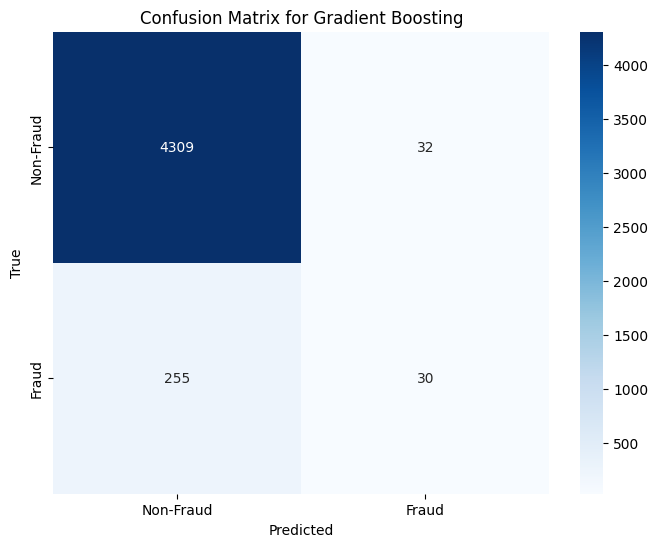

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100,201),
    'max_depth': randint(3,7),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.5, 0.5),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 8)
}

# RandomizedSearchCV for Gradient Boosting with expanded parameters
gbm_random = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit model on resampled data
gbm_random.fit(X_resampled, y_resampled)

# Grid search best model parameter and best score
best_params = gbm_random.best_params_
best_score = gbm_random.best_score_

# Evaluate test set
best_gbm = gbm_random.best_estimator_
y_pred = best_gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing results
print(f"Results of Gradient Boosting Classifier using RandomizedSearchCV:")
print(f"Best Parameter: {best_params}")
print(f"Best Score: {best_score}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification report:\n{classification_rep}")

#Confusion Matric graph
Confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.show()

**Model Parameter:**

learning_rate= 0.085, max_depth= 6, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 198, subsample= 0.706

**Performance on Test Data:**

Accuracy- 0.939, which understand the initial models accuracy above 94%.

ROC AUC- 0.54, It is increased from the initial models

Precision(0)- 0.94 : This model is good at detecting the non- fradulent claims by showing 94%

Precision(1)- 0.48 : Half of the fraudulent predictions are false positives

Recall(0)- 0.99 : 99% of the claims are predicted correctly

Recall(1)- 0.11 : Only 11% of the claims are predicted as fraudulent

F1-score(0)- 0.97 : Which is high for detecting non fraudulent claims

F1-score(1)- 0.17 : Poor balance between precision and recall

This model is still struggling to predict the non fraudulent claims. Hence further tuning is required for the accurate prediction.

### Objective 3: Calibrate models and data

**Model Calibration:**
RandomizedSearchCV is used for tuning hyperparameters of Gradient Boosting classifier for best model performance with the below model parameters.

learning_rate= 0.085, max_depth= 6, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 198, subsample= 0.706

**Data Calibration:**

Here we used SMOTE to balance the class distribution in the training data

### Objective 4: Document and communicate findings (incl. assumptions, limitations, constraints)

**Findings:**

Accuracy: 0.93- The accuracy score shows that the model has high accuracy and strong performance

ROC AUC: 0.54- The ROC AUC score indicates that the model has moderate ability to predict the fraudulent and non-fraudulent claims

Precision, Recall and F1-score for fraudulent claim - The Recall and F1-score for fraudulent claim detection is very less. However, the Precision score is moderate which means whenever the model predicts the claim as fraudulent it may be correct half the time.

**Assumptions:**

The assumption in the base of this model, that the synthetic data generated with SMOTE real case of fraudulent of vehicle insurance claim, in the future datasets show similar patterns and distributions to the training data. This also assumes that the chosen models are thorough and constantly important.


**Limitations:**

In general, the model has high accuracy but it struggles to identify the fraudulent claim with the low Precision and recall. High processing time might be due to overfitting on the balanced training data and the high complexity demands a lot from the computational resources.

**Constraints:**

Training and boosting the model are computationally costly and time consuming, success is strongly dependent on the quality and preprocessed data used to train it. It may reduce effectiveness of imbalanced data while applying the model in real world

# **Deployment:**

### Objective 1: Perform business validation of the model

**Business Validation:**

When comparing all the model, Gradient Boost classification achieves good performance with high accuracy of 0.93. However, the Precision and
recall score is too low which shows that the model is struggling to detect fraudulent claims that can affect the financial outcomes and operations.

Before the model deployment, it must first evaluate with other systems for applicability and computing resources, as it has vital processing requirement.

### Objective 2: Produce the report with findings and recommendations for deployment

**Findings:**

From the overall results we can say that the model has accuracy of 93.9% and ROC AUC of 54% for classifying claims. However for fraudulent claim detection it needs improvement because of the less recall and precision score.

The model is good in predicting the non fraudulent claims but recall of 11% and f1-score 17% shows that it struggles to detect the fraudulent claims

Precision of 48% means that half of the time the model predicts the fraudulent claims correctly. However many fraudulent claims can be missed to identify due to the low recall score.



**Recommentations:**

When detecting fraudulent claims we can use more resampling approaches to achieve the high recall score for the increased model performance. Furthemore, calibration methods can be used fine tune probability thresholds and enhance accuracy for fraudulent prediction.

When combining the Gradient Boosting methods with other methods can take use of various strengths and also addressing the imbalance of dataset. Models can be smoothly deployed maintained by handling technical requirements and connecting with other current systems. However, this is mostly based on how the models are monitored and updated with new data. Thus, accuracy will remain high and system can adapt to the fraudulent claims changing patterns.

By giving detailed explanation on the model performance and limitations,the stakeholders can be able to make the decision accordingly.

# **References:**

[1] Dataset: Shivam Bansal, Vehicle Insurance Claim Fraud Detection, https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection



